In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('seismo/src')

from stat_seismo import *


%matplotlib inline

In [3]:
#test_file = '/Users/jgra0019/Documents/codes/seismo/seismo/data/sam_gcmt_raw.csv'
test_file = "/Users/jgra0019/Documents/codes/seismo/nnd_declustering/southern_california_2014-2019.csv"


# some parameters here
mbin = 0.1
num_runs = 300 # bootstrapping to get some spread

# open test file
test_df = pd.read_csv(test_file, header  = 'infer', sep = ',')
#test_df = test_df[test_df["AUTHOR"].isin(["GCMT", "gcmt"])]
print(test_df.shape)


(140624, 11)


In [4]:

# run the function
m_cut_arr = np.zeros(num_runs)
num_ev = test_df["magnitude"].shape[0]

for i in np.arange(num_runs):
    mw_sample = test_df["magnitude"].sample(num_ev, replace = True)
    m_cut = get_max_curv(mw_sample)
    if len(m_cut > 0): # happens sometimes
        m_cut = m_cut.mean()
    m_cut_arr[i] = m_cut


m_cut = m_cut_arr.mean()
m_cut_err = m_cut_arr.std()

print("cut-off magnitude: ", m_cut)
print("cut-off error: ", m_cut_err)

# calculate b-value using maximum likelihood (Aki 1965)
# another way of computing b
ev_above_cut = test_df[test_df['magnitude'] > m_cut]
diff_mag = (ev_above_cut["magnitude"] - m_cut - mbin/2)
b_est2 = 1/diff_mag.mean()
b_est2 = b_est2/np.log(10)
b_err2 = b_est2/np.sqrt(ev_above_cut.shape[0])

print("Estimated b-value: ", b_est2)
print("b-value error: ", b_err2)

# print("Second estimated b-value: ", b_est2)
# print("Second b-value error: ", b_err2)


54521     0.52
69614     0.08
69847     1.04
133142    2.05
27550     0.78
          ... 
41239     0.53
22383     2.53
23366     0.41
79402     0.47
115795    1.05
Name: magnitude, Length: 140624, dtype: float64
140624
0.0
33655     0.47
101784    1.56
98014     1.51
131434    0.86
120098    0.83
          ... 
131580    1.50
14560     0.64
124122    1.06
2531      0.51
91775     1.43
Name: magnitude, Length: 140624, dtype: float64
140624
0.0
92919     3.86
13654     1.39
56538     0.79
53383     0.76
74765     0.21
          ... 
96707     1.70
76992     0.65
123941    0.82
110528    3.36
88308     1.33
Name: magnitude, Length: 140624, dtype: float64
140624
0.0
41807     1.04
90060     1.35
23592     0.35
89881     2.16
94632     1.95
          ... 
91813     1.01
51480     1.86
133476    0.58
18012     0.88
44943     1.49
Name: magnitude, Length: 140624, dtype: float64
140624
0.0
112207    0.74
51114     1.39
69236     0.62
109705    3.51
115457    1.17
          ... 
128621    1.60

0         0.10
1         0.58
2         2.40
3         1.42
4         0.39
          ... 
140619    1.47
140620    0.23
140621    0.94
140622    0.74
140623    1.45
Name: magnitude, Length: 140624, dtype: float64
140624
0.0


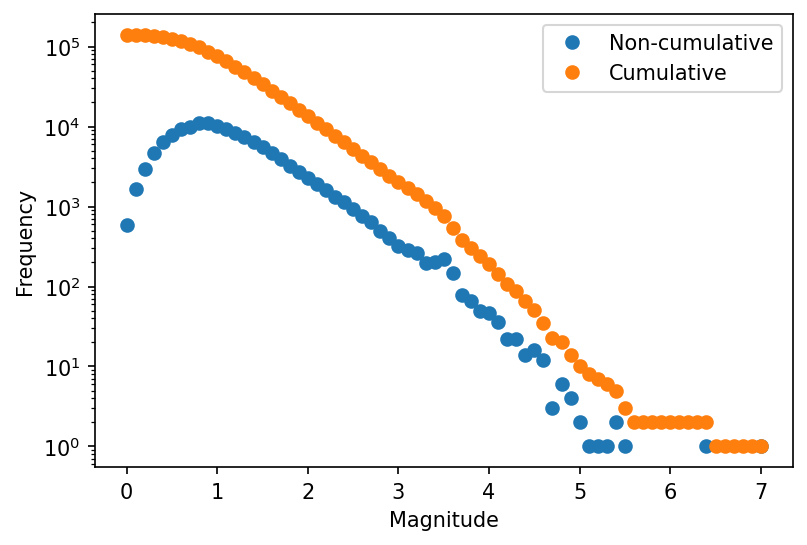

In [6]:
# look at the hist for the entire catalog
m_vals, cum_mag, non_cum_mag = get_freq_mag_dist(test_df["magnitude"], mag_bin = 0.1)

fig, ax = plt.subplots(dpi = 150)
ax.plot(m_vals, non_cum_mag, 'o', label = "Non-cumulative")
ax.plot(m_vals, cum_mag, 'o',label = "Cumulative")
ax.set_xlabel("Magnitude")
ax.set_ylabel("Frequency")
ax.set_yscale("log")
ax.legend()